# Notebook for MKMConsulting recruitment process.

This is Notebook prepared to support my application to MKMConsulting.

My goal is to show some basic skills necessary to work in Data Analysis and Data Science. This includes data manipulation, creation of simple performance metrics, creation of graphs and statistical regressions.

Important remark: 
Since Yahoo has officialy ceased operation of the Yahoo Finance API it is very hard to obtain good quality stocks data for free. Sometimes it works, sometimes not. There is a lot of inconsistent data.This is why time intervals used in different parts of Notebook may vary.I am going to upgrade it as fast as I will be able to find reliable dataset.   

All the necessary imports.

In [99]:
import plotly.plotly as py
import matplotlib.cm as cm
import plotly.graph_objs as go
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import pandas_datareader.data as web
from datetime import datetime
import datetime
from __future__ import division
from functools import wraps
from pandas.stats import moments
import quandl, math 
import plotly
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from matplotlib import style
quandl.ApiConfig.api_key = 'PrgxpHywkWc-kWacUHvA'

plotly.tools.set_credentials_file(username='TomaszCPL', api_key='2eZMSf5t3qtpMJhCpAHE')

# PART I : SINGLE STOCK ANALYSIS: 

We import data about Google from quandl.

In [100]:
google_df = quandl.get('WIKI/GOOGL', start_date="2010-12-31", end_date="2011-12-31", authtoken='PrgxpHywkWc-kWacUHvA')

In [101]:
print('Information of the dataset: ')
display(google_df.info())

Information of the dataset: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2010-12-31 to 2011-12-30
Data columns (total 12 columns):
Open           253 non-null float64
High           253 non-null float64
Low            253 non-null float64
Close          253 non-null float64
Volume         253 non-null float64
Ex-Dividend    253 non-null float64
Split Ratio    253 non-null float64
Adj. Open      253 non-null float64
Adj. High      253 non-null float64
Adj. Low       253 non-null float64
Adj. Close     253 non-null float64
Adj. Volume    253 non-null float64
dtypes: float64(12)
memory usage: 25.7 KB


None

In [102]:
print('Rows of the dataset: ')
display(google_df.head())

Rows of the dataset: 


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-12-31,596.74,598.42,592.03,593.97,3075500.0,0.0,1.0,299.293892,300.136493,296.931599,297.904603,3075500.0
2011-01-03,596.48,605.59,596.48,604.35,4725600.0,0.0,1.0,299.163489,303.732593,299.163489,303.110674,4725600.0
2011-01-04,605.62,606.18,600.12,602.12,3645300.0,0.0,1.0,303.747640,304.028507,300.989125,301.992221,3645300.0
2011-01-05,600.07,610.33,600.05,609.07,5059500.0,0.0,1.0,300.964047,306.109932,300.954016,305.477981,5059500.0
2011-01-06,610.68,618.43,610.05,613.50,4111400.0,0.0,1.0,306.285474,310.172473,305.969499,307.699840,4111400.0


Simple closing prices chart 


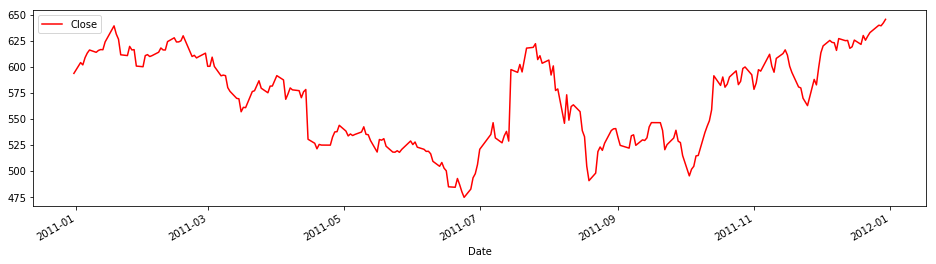

In [103]:
print('Simple closing prices chart ')
google_df[['Close']].plot(subplots=False,figsize=(16,4),color="red")

We construct standard Moving average convergence divergence (MACD), momentum indicator that shows the relationship between two moving averages of prices.I have decided to choose standard 12/26.

In [104]:
ma_day = [12,26,40]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    google_df[column_name]=google_df['Close'].rolling(ma).mean()

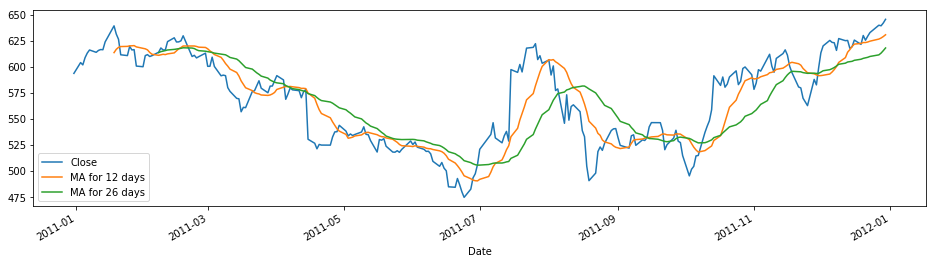

In [105]:
google_df[['Close','MA for 12 days','MA for 26 days']].plot(subplots=False,figsize=(16,4))

Above, we visualize the stock price changes (calculated with close price) using line charts. But there are other prices in one day, including open, high, low, and close. A candlestick chart can be used to see all four variables in one plot. Candlesticks are usually composed of the body and an upper and a lower shadow (or wick). The body illustrates the opening and closing trades. The wick illustrates the highest and lowest traded prices during the time interval represented.

In [106]:
print("Google candlestick chart")

google = go.Candlestick(x = google_df.index,
                       open = google_df.Open,
                       high = google_df.High,
                       low = google_df.Low,
                       close = google_df.Close)
data = [google]
py.iplot(data, filename='simple_candlestick',figsize=(16,4))

Google candlestick chart
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~TomaszCPL/0 or inside your plot.ly account where it is named 'simple_candlestick'


# PART II: STOCKS COMPARISION

Many indicate that technology is the most important industry for stocks today.Thus I have choosen to compare different companies from this sector.(At first I wanted to take under consideration WIG20 but the data was very poor quality).

In [107]:
# tickers = ['AAPL', 'MSFT', 'FB', 'AMZN', 'JNJ', 'SPY']
close = web.DataReader(['FB', 'MSFT', 'GOOGL', 'AMZN', 'JNJ','AAPL'],'yahoo')['Adj Close']
#close = quandl.get(["WIKI/GOOGL.4", "WIKI/FB.4","WIKI/AAPL.4","WIKI/AMZN.4","WIKI/MSFT.4"],start_date="2016-11-30", end_date="2017-11-30")
display(close.head())
print("Information of the dataset")

,AAPL,AMZN,FB,GOOGL,JNJ,MSFT
Date,,,,,,
2009-12-31,26.986492,134.520004,NaN,310.300293,50.326157,24.766968
2010-01-04,27.406532,133.899994,NaN,313.688690,50.537102,25.148876
2010-01-05,27.453915,134.690002,NaN,312.307312,49.951118,25.157001
2010-01-06,27.017223,132.250000,NaN,304.434448,50.357391,25.002611
2010-01-07,26.967278,130.000000,NaN,297.347351,49.997990,24.742592


Information of the dataset


In [108]:
display(close.describe())

,AAPL,AMZN,FB,GOOGL,JNJ,MSFT
count,1995.000000,1995.000000,1395.000000,1995.000000,1995.000000,1995.000000
mean,82.663049,409.176993,84.505290,520.877611,81.500386,37.816149
std,35.857105,267.136855,44.823407,227.282467,26.715185,16.181803
min,24.594294,108.610001,17.730000,218.253250,45.302990,18.869308
25%,51.875726,204.279999,47.034999,304.597107,54.403313,23.911312
50%,77.506920,307.359985,79.040001,518.133118,82.750824,33.206383
75%,108.510887,574.375000,118.035000,717.399994,98.058742,48.822565
max,175.608719,1195.829956,183.029999,1072.010010,142.745850,84.879997


We can also look at correlation between companies.

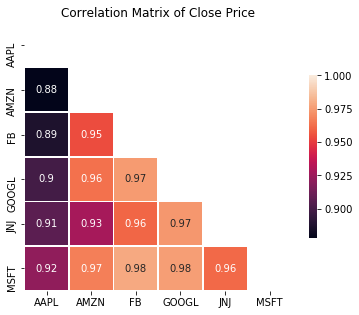

In [109]:
# calculate correlation matrix
corr = close.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot correlation matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix of Close Price');

Observation:
Overall, these stocks are highly correlated, with correlation coefficients close to 1.

Then we calculate historical stock returns for different companies.

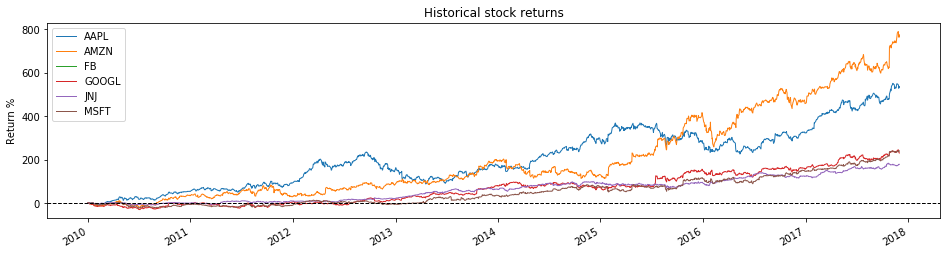

In [110]:
close_copy = close.copy()
close_copy = (close_copy - close_copy.iloc[0, :])/close_copy.iloc[0, :]*100 
close_copy.plot(legend=True, figsize=(16, 4), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('')
plt.ylabel('Return %')
plt.title('Historical stock returns');

We can observe that Amazon stock stands out from the plot with over 700% returns over the past five years 

Stock prices change on a daily basis, so we can also calculate daily returns to monitor the magnitude of the investment value.

In [111]:
print("Daily return for selected stocks")
close_copy = close.copy() 
daily_retn = close_copy.pct_change().dropna()
display(daily_retn.head())

Daily return for selected stocks


,AAPL,AMZN,FB,GOOGL,JNJ,MSFT
Date,,,,,,
2012-05-21,0.058260,0.019920,-0.109861,0.022835,0.001895,0.016399
2012-05-22,-0.007679,-0.012746,-0.089039,-0.021674,0.000787,0.000336
2012-05-23,0.024400,0.009056,0.032258,0.014414,-0.003936,-0.021841
2012-05-24,-0.009184,-0.009389,0.032187,-0.009517,0.007022,-0.001374
2012-05-25,-0.005360,-0.010918,-0.033909,-0.020094,-0.009350,-0.000344


In [112]:
print('Statistics of the daily return for selected stocks: ')
display(daily_retn.describe())

Statistics of the daily return for selected stocks: 


,AAPL,AMZN,FB,GOOGL,JNJ,MSFT
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,0.000783,0.001380,0.001362,0.000975,0.000725,0.000963
std,0.015468,0.018232,0.023511,0.013857,0.008519,0.014021
min,-0.123558,-0.109972,-0.116946,-0.080067,-0.032339,-0.113996
25%,-0.006640,-0.007575,-0.009081,-0.005894,-0.003615,-0.006004
50%,0.000493,0.000719,0.001001,0.000577,0.000466,0.000369
75%,0.008989,0.010783,0.011889,0.007770,0.005593,0.007751
max,0.081982,0.141311,0.296115,0.162584,0.049585,0.104523


We can make a plot of returns for given time interval.

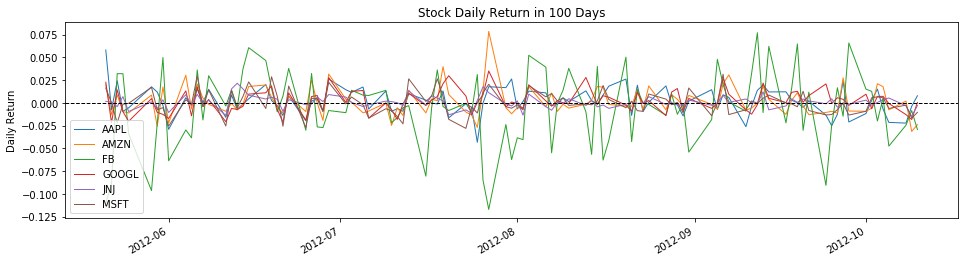

In [113]:
daily_retn.iloc[:100].plot(legend=True, figsize=(16, 4), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.ylabel('Daily Return')
plt.xlabel('')
plt.title('Stock Daily Return in 100 Days');

This plot shows the relationship between a stock's return and volatility for the selected stocks.

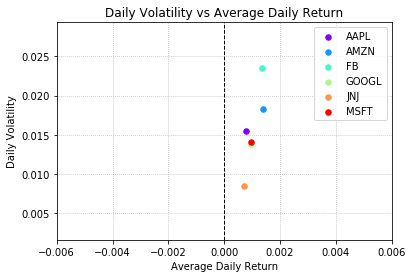

In [114]:
# plot daily volatility vs average daily return
colors = cm.rainbow(np.linspace(0, 1, len(daily_retn.columns)))
fig, ax = plt.subplots(figsize=(6, 4))

for l, x, y, c in zip(daily_retn.columns, 
                      daily_retn.mean(), 
                      daily_retn.std(), 
                      colors):
    plt.scatter(x, y, color=c, s=30, label=l)

plt.axvline(x=0, linewidth=1, linestyle='dashed', color='black')

ax.grid(True, linestyle=':', linewidth=0.75)
plt.xlim([-0.006, 0.006])
plt.xlabel('Average Daily Return')
plt.ylabel('Daily Volatility')
plt.title('Daily Volatility vs Average Daily Return')
plt.legend();

The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Subtracting the risk-free rate from the mean return, the performance associated with risk-taking activities can be isolated.

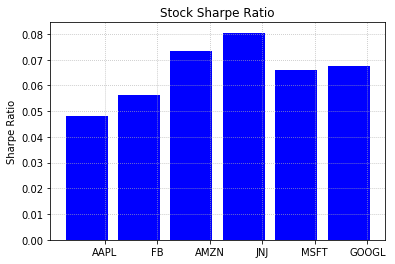

In [115]:
# calculate sharpe ratio 
daily_rf_retn = (1 + 0.01)**(1/252) - 1 
daily_retn_adj = daily_retn - daily_rf_retn
sharpe = {}
for t in daily_retn_adj.columns:
    sharpe[t] = daily_retn_adj[t].mean() / daily_retn_adj[t].std()
# plot sharpe ratio
ind = np.arange(len(sharpe))
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind, list(sharpe.values()), color='blue')
ax.set_ylabel('Sharpe Ratio')
ax.set_title('Stock Sharpe Ratio')
ax.set_xticks(ind + width)
ax.set_xticklabels(list(sharpe.keys()))
ax.grid(True, linestyle=':', linewidth=0.75);


Observations:
We can see that AAPl has smallest risk-adjusted return.

# PART III:Price Prediction

In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. We can use it to predict future stock price.

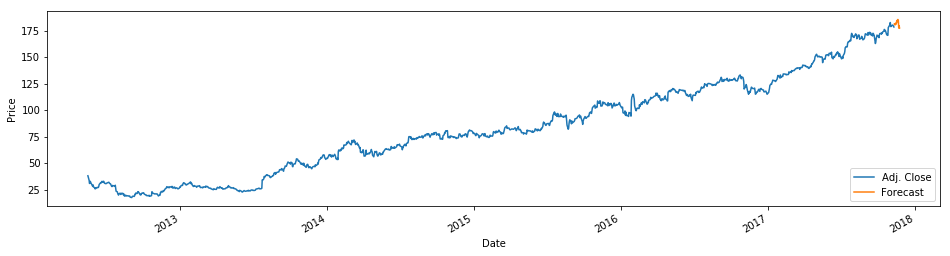

In [116]:
#We define new dataframe
df = quandl.get("WIKI/FB",)
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

#We make data preprocessing
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])
#We define training set 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot(figsize=(16,4))
df['Forecast'].plot(figsize=(16,4))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure()
plt.show()